In [1]:
#importing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
#Reading CSV file "Iris.csv"
df=pd.read_csv("Iris.csv")
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
Y=list(df[df.columns[-1]])        #taking last column as target attribute,assigning to Y
# print(Y)

In [4]:
#Removing outliers
column_names = df.columns[0:4]                #Obtaining column names

def replace_outliers_with_median(df, column_names):
    #alloting details of data to description
    description = df.describe()
    print('Outliers:\n')
    for col in column_names:
        outliers = []
        #defining lower and upper quartile
        lower_quartile = description[col]['25%']
        upper_quartile = description[col]['75%']
        #defining IQR range
        inter_quartile_range = upper_quartile - lower_quartile
        #finding median
        median_cal = df[col].median()
        #detecting outlier in the data
        for i in range(len(df)):
            #checking from given condition
            if not (lower_quartile - 1.5 * inter_quartile_range < df.loc[i, col] < upper_quartile + 1.5 * inter_quartile_range):
                outliers.append(df.loc[i,col])
                # Replace the outlier with the median
                df.loc[i, col] = median_cal
        #printing number of outliers in every column
        print(f'For {col}', "number of outliers:",len(outliers))
    return df
#alloting modified data to X
x = replace_outliers_with_median(df, column_names)[df.columns[0:4]]

Outliers:

For SepalLengthCm number of outliers: 0
For SepalWidthCm number of outliers: 4
For PetalLengthCm number of outliers: 0
For PetalWidthCm number of outliers: 0


Performing PCA

[[0.36256147949799217, -0.7102593588503732, -0.5363965021562503, 0.27633242521322776], [-0.06789731937985045, -0.6656572166407149, 0.6715432920981593, -0.3183080752873405], [0.8572697537932992, 0.20451143964215768, 0.06774170716898746, -0.4676266688251427], [0.3592042550366489, 0.10299118484164219, 0.5066749060515402, 0.7769463678955871]]
[[-2.6817473  -0.36613367]
 [-2.72031093  0.10874681]
 [-2.89212967  0.09721609]
 [-2.75014213  0.27571004]
 [-2.72479318 -0.36167346]
 [-2.271116   -0.7635227 ]
 [-2.82031788  0.06586085]
 [-2.62548674 -0.20809087]
 [-2.89480194  0.53044221]
 [-2.67729412  0.05233311]
 [-2.50083134 -0.69189178]
 [-2.61227206 -0.04558785]
 [-2.79248751  0.16947363]
 [-3.23094917  0.46324987]
 [-2.63335687 -1.23704612]
 [-2.27269392 -0.4184113 ]
 [-2.61402391 -0.84532727]
 [-2.64582687 -0.35583455]
 [-2.19147825 -0.9203339 ]
 [-2.58046909 -0.53508057]
 [-2.3090082  -0.45129232]
 [-2.53775894 -0.45821573]
 [-3.21272567 -0.15937429]
 [-2.30322563 -0.14075144]
 [-2.355091

C:\Users\abhij\AppData\Local\Temp\ipykernel_1796\1004367027.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[j,i]=(x[i][j]-m1)                   #subracting mean from every element of the column


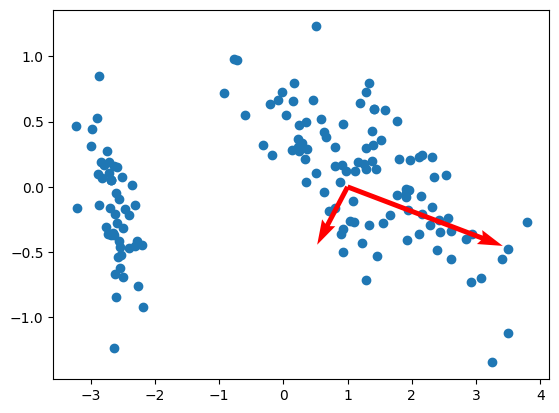

In [5]:
x_original=x.copy()
#Getting mean subtracted matrix
for i in x.columns:
  m1=np.mean(x[i])                            #Getting mean of each column
  for j in range(len(x)):
    x.loc[j,i]=(x[i][j]-m1)                   #subracting mean from every element of the column
x_mat=np.asmatrix(x.values)                   #converting dataframe into matrix
x_mat_t=np.transpose(x_mat)                   #finding transpose of the matrix
c=x_mat_t*x_mat                               #calculating value of C
eig_value, eig_vector1=np.linalg.eig(c)       #Performing eigen analysis and finding eigen value and eig vector
# 
# print(eig_value)
# print(eig_vector1)
select_vector=[list(),list()]
eig_vector1=eig_vector1.tolist()
print(eig_vector1)
for i in range(4):                                  #Selcting two eigen vectors
  select_vector[0].append(eig_vector1[i][0])
  select_vector[1].append(eig_vector1[i][1])
select_vector=np.asmatrix(select_vector)            #converting to matrix
x_reduced=x_mat*select_vector.transpose()
print(x_reduced)
plt.scatter(list(x_reduced[i].tolist()[0][0] for i in range(150)),list(x_reduced[i].tolist()[0][1] for i in range(150)))
select_vector=select_vector.tolist()

#plotting grapg of eigen vectors
plt.quiver(1,0 ,select_vector[0][0],select_vector[0][1],angles='xy', scale_units='xy',color='red', scale=0.15, width=0.01)
plt.quiver(1,0, (select_vector[1][0]), (select_vector[1][1]),  angles='xy', scale_units='xy',color='red', scale=1.5, width=0.01)
plt.show()

In [6]:
x_reconstructed=x_reduced*select_vector        #Reconstructing the original data from reduced data
print(x_reconstructed)

[[-7.12248402e-01  4.25802973e-01 -2.37385937e+00 -1.00100358e+00]
 [-1.06351840e+00  1.12313722e-01 -2.30980032e+00 -9.65947300e-01]
 [-1.11762345e+00  1.31655257e-01 -2.45945349e+00 -1.02885288e+00]
 [-1.19292124e+00  3.19890144e-03 -2.30122781e+00 -9.59467053e-01]
 [-7.31023089e-01  4.25756699e-01 -2.40984914e+00 -1.01600648e+00]
 [-2.81120038e-01  6.62447081e-01 -2.10310818e+00 -8.94430640e-01]
 [-1.06931691e+00  1.47651275e-01 -2.40430392e+00 -1.00628710e+00]
 [-8.04101869e-01  3.16780700e-01 -2.29330733e+00 -9.64517533e-01]
 [-1.42629522e+00 -1.56543393e-01 -2.37314465e+00 -9.85194303e-01]
 [-1.00785380e+00  1.46945179e-01 -2.28446055e+00 -9.56305589e-01]
 [-4.15282501e-01  6.30362499e-01 -2.28538685e+00 -9.69568013e-01]
 [-9.14730023e-01  2.07712154e-01 -2.24874506e+00 -9.43034386e-01]
 [-1.13281863e+00  7.67910734e-02 -2.35925578e+00 -9.85619105e-01]
 [-1.50044527e+00 -8.89928340e-02 -2.67505510e+00 -1.11286004e+00]
 [-7.61301811e-02  1.00224655e+00 -2.51048728e+00 -1.07331784e

In [7]:
df2=pd.DataFrame(x_reconstructed)                   #converting to dataframe
df2.columns=x.columns
for i in x.columns:
  m1=np.mean(x_original[i])                         #Getting mean of each column
  for j in range(len(x)):
    df2.loc[j,i]=(df2[i][j]+m1)                     #adding mean from every element of the column
print(df2)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         5.131085      3.461803       1.384807      0.197663
1         4.779815      3.148314       1.448866      0.232719
2         4.725710      3.167655       1.299213      0.169814
3         4.650412      3.039199       1.457439      0.239200
4         5.112310      3.461757       1.348818      0.182660
..             ...           ...            ...           ...
145       6.673460      3.021342       5.389362      1.878894
146       6.139062      2.694265       5.133364      1.780880
147       6.529151      2.959592       5.257552      1.825587
148       6.567881      2.937472       5.384195      1.878974
149       6.119627      2.728712       5.014744      1.730510

[150 rows x 4 columns]


In [8]:
rmse_list=list()                                                   #Calculting rmse difference between original and recreated data

for i in x.columns:
  d1=list(x_original[i])
  d2=list(df2[i])
  rmse=0
  for j in range(150):
    if d1[j]!=d2[j]:
      rmse+=(d1[j]-d2[j])**2                                       #summing up the square of difference for every element of the column
  rmse=rmse/len(d1)                                                #dividing the value by n
  rmse=math.sqrt(rmse)                                             #operating square root 
  rmse_list.append(rmse)
print(rmse_list)

[0.1589629858489278, 0.1978567102177245, 0.07643589847170444, 0.18958302357254295]
